In [56]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fft
from scipy.constants import pi
import nmrglue

In [57]:
base = '/Users/john/Documents/SURF/Lundstrom'
filename0 = base + '/MRI_test_data/s_20210205_Michele_Orange_01/gems_01.fid/fid'
filename1 = base + '/MRI_test_data/s_20210205_Michele_Orange_01/sems_01.fid/fid'
filename2 = base + '/MRI_test_data/s_20210205_Michele_Orange_01/sems_02.fid/fid'
filename3 = base + '/MRI_test_data/s_20210528_SURF/sems_fruit1_01.fid/fid'
filename4 = base + '/Go bananas/FIDs/single slices/sems_slice_ax_2avg_TR_1000ms_256x256_01.fid/fid'
filename5 = base + '/Go bananas/FIDs/single slices/sems_slice_ax_3avg_TR_1000ms_256x256_01.fid/fid'
filename6 = base + '/Go bananas/FIDs/single slices/sems_slice_cor_2avg_TR_1000ms_256x256_01.fid/fid'
filename7 = base + '/Go bananas/FIDs/single slices/sems_slice_cor_3avg_TR_1000ms_256x256_01.fid/fid'
filename8 = base + '/Go bananas/FIDs/single slices/sems_slice_sag_2avg_TR_1000ms_256x256_01.fid/fid'
filename9 = base + '/Go bananas/FIDs/single slices/sems_slice_sag_3avg_TR_1000ms_256x256_01.fid/fid'
files = [filename0, filename1, filename2, filename3, filename4, filename5, filename6, filename7, filename8, filename9]

In [58]:
def flip(data):
    ## Flip quads 2, 4
    shape = data.shape
    shape = np.array(shape)
    quad = shape / 2
    quad = quad.astype(int)
    tmp = data[0:quad[0], 0:quad[1]].copy()
    data[0:quad[0], 0:quad[1]] = data[quad[0]-1:-1, quad[1]-1:-1]
    data[quad[0]-1:-1, quad[1]-1:-1] = tmp
    ## Flip quads 1, 3
    shape = data.shape
    shape = np.array(shape)
    quad = shape / 2
    quad = quad.astype(int)
    tmp = data[quad[0]-1:-1, 0:quad[1]].copy()
    data[quad[0]-1:-1, 0:quad[1]] = data[0:quad[0], quad[1]-1:-1]
    data[0:quad[0], quad[1]-1:-1] = tmp
    return data

In [59]:
def plot(plots, ylabel, title = 0):
    numPlots = len(plots)
    fig, ax = plt.subplots(1, numPlots, figsize = (17, 3))
    for i in range(numPlots):
        cax = ax[i].imshow(plots[i])
        if(title != 0):
            ax[i].set_title(title[i])
        fig.colorbar(cax, ax=ax[i])
    ax[0].set_ylabel(ylabel)

In [60]:
def changeData(data, center, length, val):
    center = ((data.shape - np.ones(2)) * center).astype(int)
    halfLen = (np.array(data.shape) * length * 0.5).astype(int)
    bottomLeft = (center + np.array([1, -1]) * halfLen).astype(int)
    topLeft = (center + np.array([-1, -1]) * halfLen).astype(int)
    topRight = (center + np.array([-1, 1]) * halfLen).astype(int)
    bottomRight = (center + np.array([1, 1]) * halfLen).astype(int)
    data[topLeft[0]+1:bottomLeft[0]+1, topLeft[1]+1: topRight[1]+1] = val
    return data

In [61]:
def changeRandomData(data, numPoints, val):
    for i in range(numPoints):
        x = np.random.randint(0, data.shape[0])
        y = np.random.randint(0, data.shape[1])
        data[x, y] = val
    return data

In [62]:
def createMagImages(kspace):
    kspace = kspace / np.amax(kspace) ### Normalize
    image = scipy.fft.fftshift(scipy.fft.ifft2(scipy.fft.fftshift(kspace)))
    rek = scipy.fft.fftshift(scipy.fft.fft2(scipy.fft.fftshift(image)))
    magnitude = np.array([np.absolute(kspace),
                         np.absolute(image),
                         np.absolute(rek),
                         (np.absolute(np.absolute(kspace) - np.absolute(rek)))])
    return magnitude

In [63]:
def createPhaseImages(kspace):
    kspace = kspace / np.amax(kspace) ### Normalize
    image = scipy.fft.fftshift(scipy.fft.ifft2(scipy.fft.fftshift(kspace)))
    rek = scipy.fft.fftshift(scipy.fft.fft2(scipy.fft.fftshift(image)))
    phase = np.array([np.arctan(kspace.imag/kspace.real),
                     np.arctan(image.imag/image.real),
                     np.arctan(rek.imag/rek.real),
                     np.absolute(np.arctan(kspace.imag/kspace.real) - np.arctan(rek.imag/rek.real))])
    return phase

# Deleting K-Space data

## Magnitude

### Box

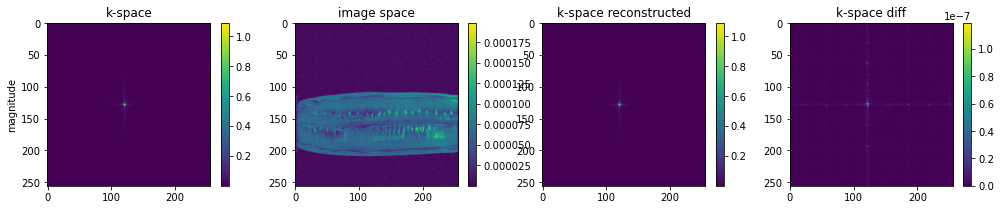

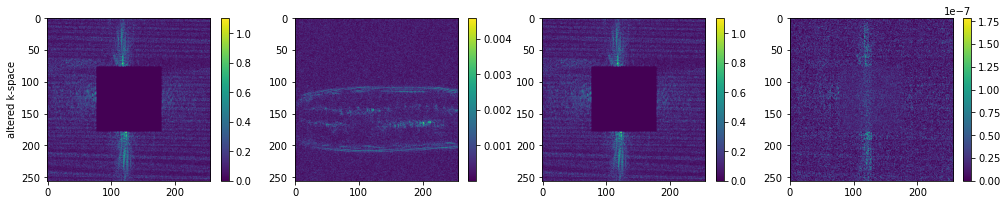

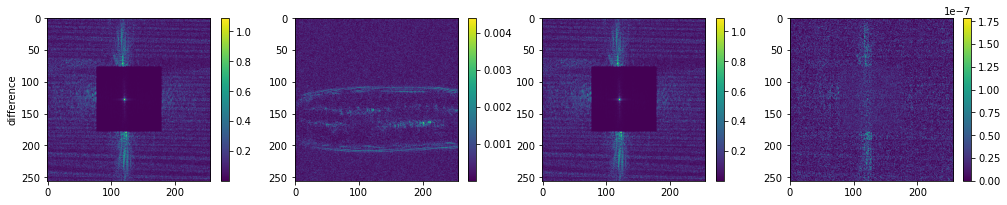

In [72]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
magnitude = createMagImages(data)
data = changeData(data, [0.5, 0.5], 0.4, 0)
# data = changeRandomData(data, 1, 0)
changeMag = createMagImages(data)
plot(magnitude, 'magnitude', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changeMag, 'altered k-space')
plot(np.absolute(magnitude - changeMag), 'difference')

### Horizontal Lines

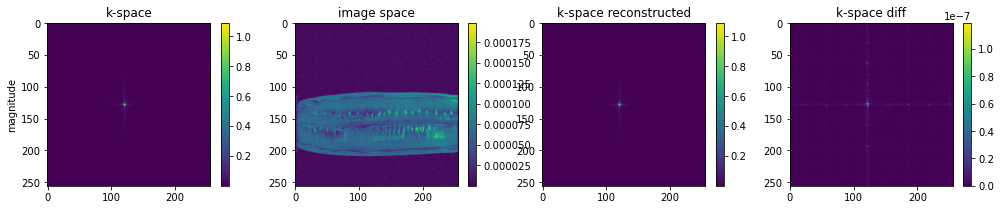

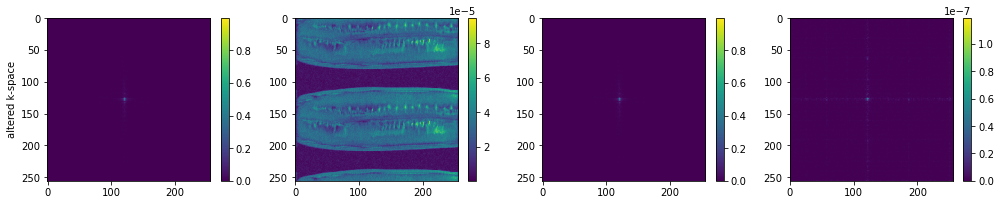

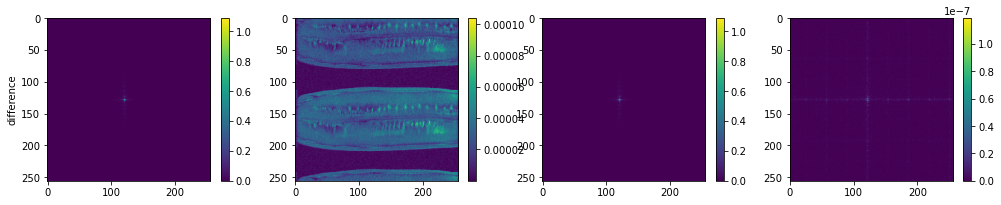

In [65]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
magnitude = createMagImages(data)
for i in range(data.shape[0]):
    if(i % 2 == 0):
        data[i, :] = np.zeros((1, data.shape[1]))
changeMag = createMagImages(data)
plot(magnitude, 'magnitude', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changeMag, 'altered k-space')
plot(np.absolute(magnitude - changeMag), 'difference')

### Vertical Lines

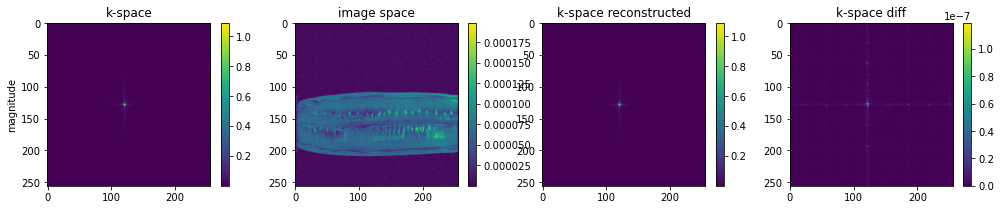

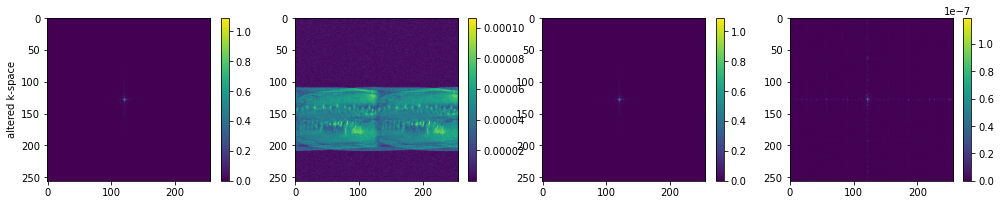

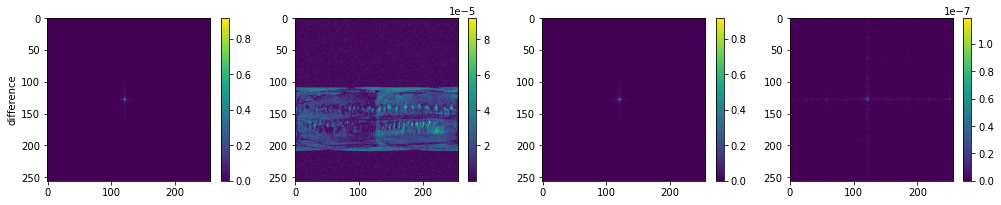

In [66]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
magnitude = createMagImages(data)
for i in range(data.shape[1]):
    if(i % 2 == 0):
        data[:, i] = np.zeros((data.shape[0]))
changeMag = createMagImages(data)
plot(magnitude, 'magnitude', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changeMag, 'altered k-space')
plot(np.absolute(magnitude - changeMag), 'difference')

## Phase

### Box

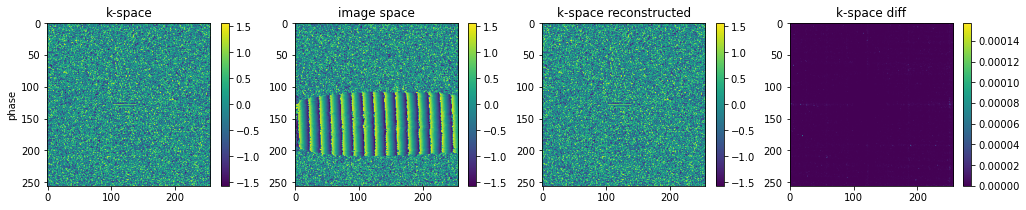

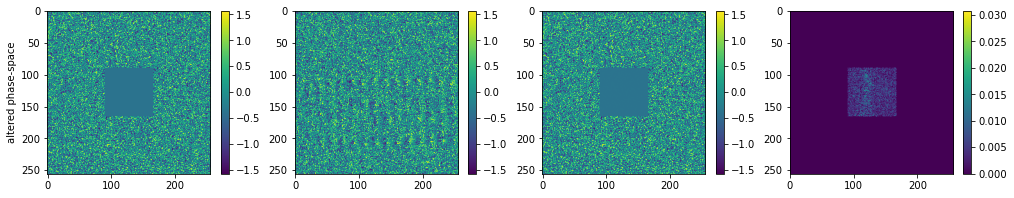

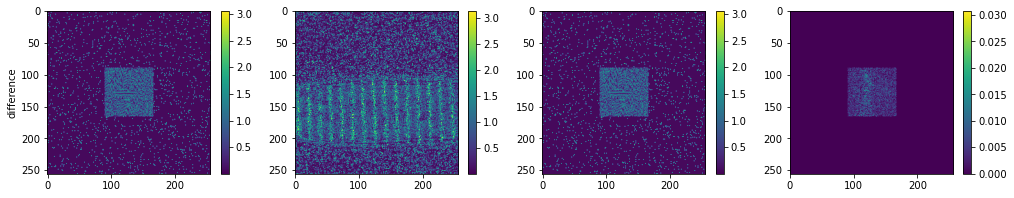

In [67]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
phase = createPhaseImages(data)
data = changeData(data, [0.5, 0.5], 0.3, 1e-4)
# data = changeRandomData(data, 2000, 1e-4)
changePhase = createPhaseImages(data)
plot(phase, 'phase', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changePhase, 'altered phase-space')
plot(np.absolute(phase - changePhase), 'difference')

### Horizontal Lines

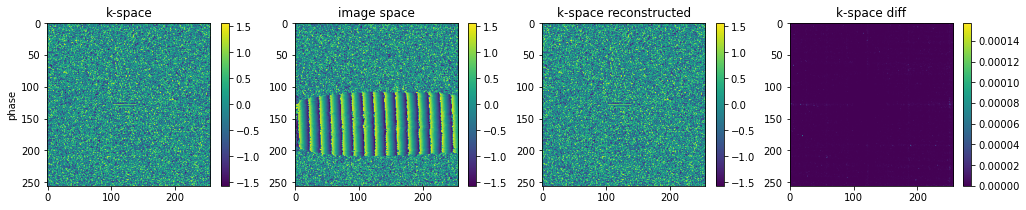

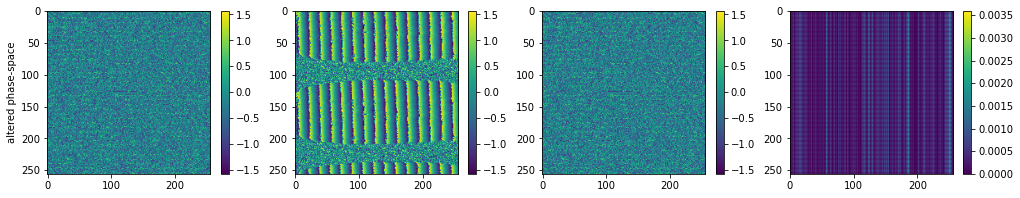

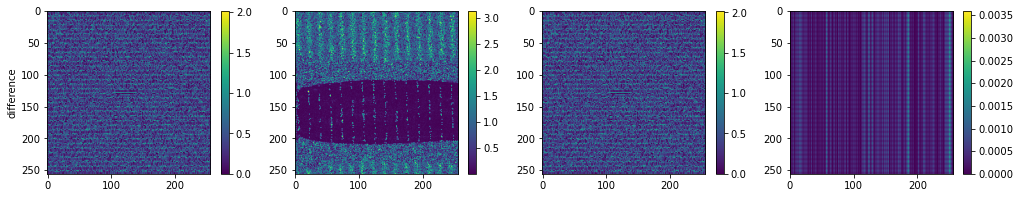

In [68]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
phase = createPhaseImages(data)
for i in range(data.shape[0]):
    if(i % 2 == 0):
        data[i, :] = np.full((1, data.shape[1]), 1e-4)
changePhase = createPhaseImages(data)
plot(phase, 'phase', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changePhase, 'altered phase-space')
plot(np.absolute(phase - changePhase), 'difference')

### Vertical Lines

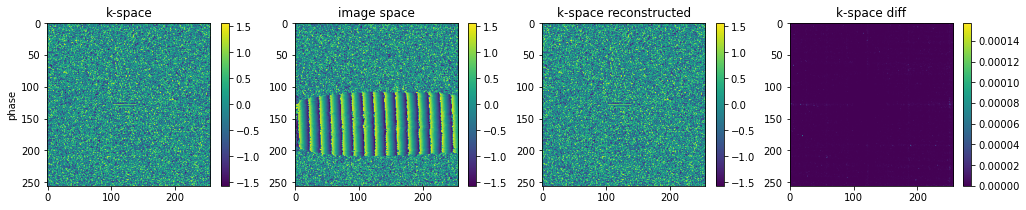

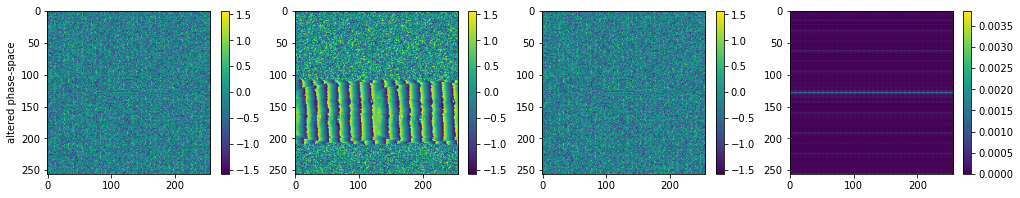

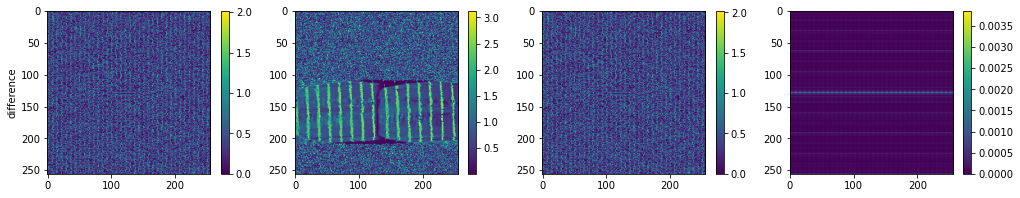

In [69]:
headers, data = nmrglue.fileio.varian.read_fid(files[9])
phase = createPhaseImages(data)
for i in range(data.shape[1]):
    if(i % 2 == 0):
        data[:, i] = np.full((data.shape[0]), 1e-4)
changePhase = createPhaseImages(data)
plot(phase, 'phase', ['k-space', 'image space', 'k-space reconstructed', 'k-space diff'])
plot(changePhase, 'altered phase-space')
plot(np.absolute(phase - changePhase), 'difference')